In [83]:
# imports
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from networkx.algorithms import bipartite

%matplotlib inline

In [3]:
# read in the speed dating data
df = pd.read_csv('./speed_dating.csv')

In [4]:
# clean up data frame
# TODO: deal with NaNs (columns w/ only NaNs and columns partially filled w/ NaNs)

df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [72]:
# create graphs for each wave
waves = df['wave'].unique()
graphs = list()

for w in waves:
    dta = df.loc[df['wave'] == w]
    G = nx.from_pandas_dataframe(dta,'iid','pid',edge_attr=['match','samerace'])
    
    # set node attributes
    genders = dta[['iid','gender']]
    genders = genders.set_index('iid').T.to_dict('records')[0] # convert to dictionary
    nx.set_node_attributes(G,'gender',genders)
    
    G = nx.convert_node_labels_to_integers(G,first_label=1)
    graphs.append(G)

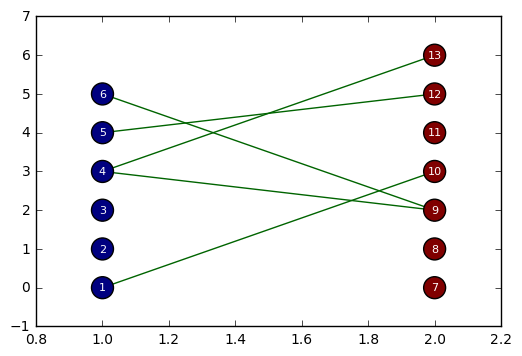

In [104]:
G = graphs[19] # for test value

# draw as bipartite graph (best way to visualize this?)
X,Y = bipartite.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2

# draw only edges where the two people matched
matches = list()
for u,v in G.edges():
    if G[u][v]['match'] == 1:
        matches.append( (u,v) )

# get genders for each node
genders = nx.get_node_attributes(G,'gender').values()
        
nx.draw_networkx_nodes(G,pos,node_color=genders,node_size=250)
nx.draw_networkx_labels(G,pos,font_color='white',font_size=8)
nx.draw_networkx_edges(G,pos,edgelist=matches,edge_color='darkgreen')

({1, 2, 3, 4, 5, 6, 7, 8, 9, 10}, {11, 12, 13, 14, 15, 16, 17, 18, 19, 20})